In [43]:
import numpy as np 
import pandas as pd 
import wget
import sys
sys.path
sys.executable

'c:\\Users\\vidya\\Documents\\ML_ZOOMCAMP\\venv\\Scripts\\python.exe'

In [44]:
df=pd.read_csv("bank-full.csv",sep=";")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [45]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [46]:
df.drop(columns=['default',"loan"],inplace=True,axis=1)


In [47]:
my_df=df.copy()
my_df.head()

age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unknown  no  
1       151         1     -1         0  unknown  no  
2        76         1     -1         0  unknown  no  
3        92         1     -1         0  unknown  no  
4       198         1     -1         0  unknown  no

In [48]:
my_df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

EDA
The tagret variable y is a categorical variable with yes and no as two outcome.

In [49]:
my_df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [50]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [52]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [53]:
print("categorical columns",my_df.select_dtypes(include="object").columns.values)
print("Numerical columns",my_df.select_dtypes(include=np.number).columns.values)


categorical columns ['job' 'marital' 'education' 'housing' 'contact' 'month' 'poutcome' 'y']
Numerical columns ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


Observation: Its a Highly inbalanced dataset with more "no"values in observations.
There is no missing values but the column has "unknown" as a category which may have been used to represent missing data
Dataset contains both categorical ad numerical variables
categorical columns ['job' 'marital' 'education' 'housing' 'contact' 'month' 'poutcome' 'y']
Numerical columns ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']




Question 1
What is the most frequent observation (mode) for the column education?

unknown
primary
secondary
tertiary

In [54]:
my_df.education.mode()

0    secondary
Name: education, dtype: object

Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

age and balance
day and campaign
day and pdays
pdays and previous

<Axes: >

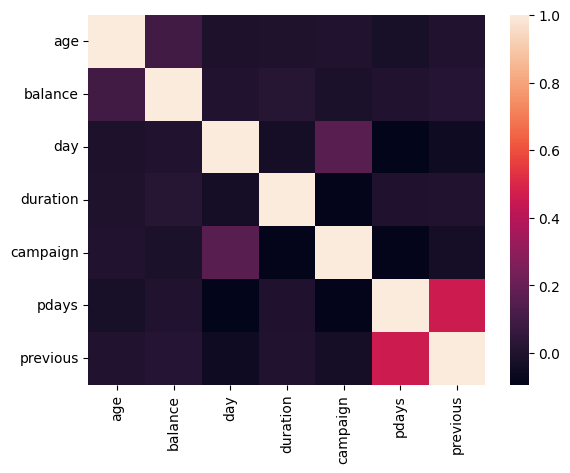

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
num_df=df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr())

In [56]:
num_df.corr().unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
duration  duration    1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

previous and pdays has high correlatiom

Target encoding
Now we want to encode the y variable.
Let's replace the values yes/no with 1/0.

In [57]:
my_df["y"].head(100)

0     no
1     no
2     no
3     no
4     no
      ..
95    no
96    no
97    no
98    no
99    no
Name: y, Length: 100, dtype: object

In [58]:
def encoding(x):
    if x=="no":
        return 0
    else:
        return 1

In [59]:
my_df["y"]=df["y"].apply(lambda x:encoding(x))
my_df["y"].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: y, Length: 100, dtype: int64

In [60]:
X=my_df.drop(columns="y",axis=1)
X

age           job   marital  education  balance housing    contact  \
0       58    management   married   tertiary     2143     yes    unknown   
1       44    technician    single  secondary       29     yes    unknown   
2       33  entrepreneur   married  secondary        2     yes    unknown   
3       47   blue-collar   married    unknown     1506     yes    unknown   
4       33       unknown    single    unknown        1      no    unknown   
...    ...           ...       ...        ...      ...     ...        ...   
45206   51    technician   married   tertiary      825      no   cellular   
45207   71       retired  divorced    primary     1729      no   cellular   
45208   72       retired   married  secondary     5715      no   cellular   
45209   57   blue-collar   married  secondary      668      no  telephone   
45210   37  entrepreneur   married  secondary     2971      no   cellular   

       day month  duration  campaign  pdays  previous poutcome  
0        5   may       261         1     -1         0  unknown  
1        5   may       151         1     -1         0  unknown  
2        5   may        76         1     -1         0  unknown  
3        5   may        92         1     -1         0  unknown  
4        5   may       198         1     -1         0  unknown  
...    ...   ...       ...       ...    ...       ...      ...  
45206   17   nov       977         3     -1         0  unknown  
45207   17   nov       456         2     -1         0  unknown  
45208   17   nov      1127         5    184         3  success  
45209   17   nov       508         4     -1         0  unknown  
45210   17   nov       361         2    188        11    other  

[45211 rows x 14 columns]

In [61]:
y=my_df["y"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [62]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [63]:
import sklearn
from sklearn.model_selection  import train_test_split
X_train_temp,X_test, y_train_temp,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)


In [64]:
0.6*len(X)

27126.6

In [65]:
X_train_temp.shape[0],X_test.shape[0]

(36168, 9043)

In [66]:
X_train,X_val, y_train,y_val=train_test_split(X_train_temp,y_train_temp,test_size=0.25,train_size=0.75,random_state=42)

In [67]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)

In [68]:
X_train.shape,X_val.shape,X_test.shape

((27126, 14), (9042, 14), (9043, 14))

In [69]:
y_train=y_train.values
y_train
y_test=y_test.values
y_test
y_val=y_val.values
y_val

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score?

contact
education
housing
poutcome

In [70]:
cat_df=X_train.select_dtypes(include="object")
cat_df

job   marital  education housing   contact month poutcome
0         technician    single   tertiary     yes  cellular   aug  unknown
1       entrepreneur   married  secondary     yes  cellular   nov  unknown
2        blue-collar   married  secondary     yes  cellular   may  unknown
3          housemaid   married    primary      no  cellular   aug  unknown
4      self-employed   married   tertiary      no  cellular   aug  unknown
...              ...       ...        ...     ...       ...   ...      ...
27121       services    single  secondary      no  cellular   jul  unknown
27122     technician    single   tertiary      no  cellular   jan  unknown
27123     technician  divorced  secondary     yes   unknown   may  unknown
27124       services    single  secondary      no  cellular   jul  unknown
27125     management    single   tertiary      no  cellular   aug  unknown

[27126 rows x 7 columns]

In [71]:
from sklearn.metrics import mutual_info_score
#categprical columns in X_train
X_train_cat=X_train.select_dtypes(include='object')
print("mutual information between target and categorical variables")
print("more is the score, more important is the feature for Tagret")

for col in X_train_cat:
    print(col,np.round(mutual_info_score(X_train_cat[col],y_train),4))

mutual information between target and categorical variables
more is the score, more important is the feature for Tagret
job 0.0073
marital 0.002
education 0.0027
housing 0.0103
contact 0.0134
month 0.0251
poutcome 0.0295


In [72]:
def mutual_info_score_function(series):
    return mutual_info_score(series,y_train)

mi=X_train_cat.apply(mutual_info_score_function)
mi.sort_values(ascending=False)


poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

poutcome has High mutual information

Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.6
0.7
0.8
0.9

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27126 entries, 0 to 27125
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27126 non-null  int64 
 1   job        27126 non-null  object
 2   marital    27126 non-null  object
 3   education  27126 non-null  object
 4   balance    27126 non-null  int64 
 5   housing    27126 non-null  object
 6   contact    27126 non-null  object
 7   day        27126 non-null  int64 
 8   month      27126 non-null  object
 9   duration   27126 non-null  int64 
 10  campaign   27126 non-null  int64 
 11  pdays      27126 non-null  int64 
 12  previous   27126 non-null  int64 
 13  poutcome   27126 non-null  object
dtypes: int64(7), object(7)
memory usage: 2.9+ MB


In [74]:
X_train.shape,X_test.shape,X_val.shape

((27126, 14), (9043, 14), (9042, 14))

In [75]:
#one hot encoding of categorical variables
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)
#train
X_train_dv=X_train.to_dict(orient='records')
print(X_train_dv)
X_train_enc=dv.fit_transform(X_train_dv)




[{'age': 32, 'job': 'technician', 'marital': 'single', 'education': 'tertiary', 'balance': 1100, 'housing': 'yes', 'contact': 'cellular', 'day': 11, 'month': 'aug', 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 38, 'job': 'entrepreneur', 'marital': 'married', 'education': 'secondary', 'balance': 0, 'housing': 'yes', 'contact': 'cellular', 'day': 17, 'month': 'nov', 'duration': 258, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 49, 'job': 'blue-collar', 'marital': 'married', 'education': 'secondary', 'balance': 3309, 'housing': 'yes', 'contact': 'cellular', 'day': 15, 'month': 'may', 'duration': 349, 'campaign': 2, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 37, 'job': 'housemaid', 'marital': 'married', 'education': 'primary', 'balance': 2410, 'housing': 'no', 'contact': 'cellular', 'day': 4, 'month': 'aug', 'duration': 315, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age':

In [76]:
X_test_dv=X_test.to_dict(orient='records')
print(X_test_dv)
X_test_enc=dv.transform(X_test_dv)

[{'age': 40, 'job': 'blue-collar', 'marital': 'married', 'education': 'secondary', 'balance': 580, 'housing': 'yes', 'contact': 'unknown', 'day': 16, 'month': 'may', 'duration': 192, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 47, 'job': 'services', 'marital': 'single', 'education': 'secondary', 'balance': 3644, 'housing': 'no', 'contact': 'unknown', 'day': 9, 'month': 'jun', 'duration': 83, 'campaign': 2, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 25, 'job': 'student', 'marital': 'single', 'education': 'tertiary', 'balance': 538, 'housing': 'yes', 'contact': 'cellular', 'day': 20, 'month': 'apr', 'duration': 226, 'campaign': 1, 'pdays': -1, 'previous': 0, 'poutcome': 'unknown'}, {'age': 42, 'job': 'management', 'marital': 'married', 'education': 'tertiary', 'balance': 1773, 'housing': 'no', 'contact': 'cellular', 'day': 9, 'month': 'apr', 'duration': 311, 'campaign': 1, 'pdays': 336, 'previous': 1, 'poutcome': 'failure'}, {'age': 56, 'jo

In [77]:
X_val_dv=X_val.to_dict(orient='records')
X_val_enc=dv.transform(X_val_dv)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_enc, y_train)
y_pred=model.predict(X_val_enc)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

age
balance
marital
previous

In [79]:
model_accuracy = accuracy_score(y_val, y_pred)
model_accuracy

0.9015704490157045

In [80]:
all_features=X_train.columns.to_list()
all_features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [81]:
#Feature elimination
l=[]

for feature in all_features:
    features=all_features.copy()
    features.remove(feature)
    
    dv=DictVectorizer()
    X_train_new=X_train[features]
    X_train_1=X_train_new.to_dict(orient='records')
    X_train_n=dv.fit_transform(X_train_1)
    
    X_val_new=X_val[features]
    X_val_1=X_val_new.to_dict(orient='records')
    X_val_n=dv.transform(X_val_1)
    
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_n, y_train)
    y_pred1=model.predict(X_val_n)
    accuracy1 = accuracy_score(y_val, y_pred1)
    l.append([feature,model_accuracy,accuracy1,model_accuracy-accuracy1])
print(l)


    
 






[['age', 0.9015704490157045, 0.9012386640123866, 0.00033178500331787486], ['job', 0.9015704490157045, 0.9007962840079629, 0.000774165007741634], ['marital', 0.9015704490157045, 0.9001327140013271, 0.0014377350143773837], ['education', 0.9015704490157045, 0.9010174740101747, 0.0005529750055297544], ['balance', 0.9015704490157045, 0.9013492590134926, 0.00022119000221187957], ['housing', 0.9015704490157045, 0.9014598540145985, 0.0001105950011059953], ['contact', 0.9015704490157045, 0.900575094005751, 0.0009953550099535136], ['day', 0.9015704490157045, 0.9010174740101747, 0.0005529750055297544], ['month', 0.9015704490157045, 0.8998009289980093, 0.0017695200176951476], ['duration', 0.9015704490157045, 0.8886308338863084, 0.01293961512939612], ['campaign', 0.9015704490157045, 0.9009068790090687, 0.0006635700066357497], ['pdays', 0.9015704490157045, 0.9010174740101747, 0.0005529750055297544], ['previous', 0.9015704490157045, 0.9012386640123866, 0.00033178500331787486], ['poutcome', 0.90157044

In [82]:
model_com=pd.DataFrame(data=l,columns=["feature","model_accuracy","accuracy1","difference"])
model_com

feature  model_accuracy  accuracy1  difference
0         age         0.90157   0.901239    0.000332
1         job         0.90157   0.900796    0.000774
2     marital         0.90157   0.900133    0.001438
3   education         0.90157   0.901017    0.000553
4     balance         0.90157   0.901349    0.000221
5     housing         0.90157   0.901460    0.000111
6     contact         0.90157   0.900575    0.000995
7         day         0.90157   0.901017    0.000553
8       month         0.90157   0.899801    0.001770
9    duration         0.90157   0.888631    0.012940
10   campaign         0.90157   0.900907    0.000664
11      pdays         0.90157   0.901017    0.000553
12   previous         0.90157   0.901239    0.000332
13   poutcome         0.90157   0.893276    0.008295

Question 6
Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
Which of these C leads to the best accuracy on the validation set?

0.01
0.1
1
10
100
Note: If there are multiple options, select the smallest C.

In [83]:
score=[]
C=[0.01, 0.1, 1, 10, 100]
for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train_enc, y_train)
    y_pred=model.predict(X_val_enc)
    accuracy = np.round(accuracy_score(y_val, y_pred),3)
    score.append([c,accuracy])
    
    

In [84]:
C_df=pd.DataFrame(data=score,columns=["c_value","model_accuracy"])
C_df

c_value  model_accuracy
0     0.01           0.898
1     0.10           0.901
2     1.00           0.902
3    10.00           0.901
4   100.00           0.901